In this notebook, you should implement a first version of a working machine learning model to predict the age of an Abalone.

A few guidelines:
- The model does not have to be complex. A simple linear regression model is enough.
- You should use MLflow to track your experiments. You can use the MLflow UI to compare your experiments.
- Do not push any MLflow data to the repository. Only the code to run the experiments is interesting and should be pushed.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl


In [9]:
df = pd.read_csv('../data/abalone.csv')


In [10]:
features = [
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight"
]

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[features], 
    df['Rings'], 
    test_size=0.2, 
    random_state=42
)

In [11]:
#create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
#make predictions on the test set
y = model.predict(X_test)

#evaluate the model
mse = mean_squared_error(y_test, y)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.055541144299383


In [13]:
#save the model
with open('../models/linear_regression_model.pkl', 'wb') as f:
    pkl.dump(model, f)

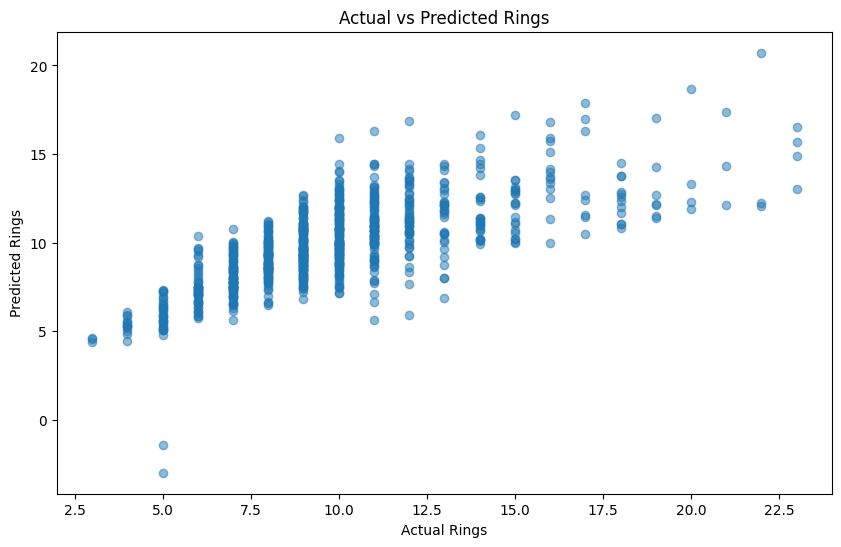

In [14]:
#plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y, alpha=0.5)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual vs Predicted Rings')
plt.show()